In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/mayankkapadia/Downloads/modified_daata.csv')

In [3]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.5-88-49183-6,192.168.10.5,49183,192.168.10.3,88,6,4/7/2017 8:54,900,9,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.5-88-49184-6,192.168.10.5,49184,192.168.10.3,88,6,4/7/2017 8:54,1205,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.5-88-49185-6,192.168.10.5,49185,192.168.10.3,88,6,4/7/2017 8:54,511,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.5-88-49186-6,192.168.10.5,49186,192.168.10.3,88,6,4/7/2017 8:54,773,9,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
for x in df.columns:
    if df[x].isnull().any()==True:
        print(x)

In [5]:
import numpy as np

for x in df.columns:
  # Attempt to convert the column to numeric, handling errors
  numeric_series = pd.to_numeric(df[x], errors='coerce')  
  if np.isinf(numeric_series).any():
    print(x)

Flow Bytes/s
 Flow Packets/s


In [6]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.dropna(inplace=True)

In [11]:
value_group_label=df.groupby([' Label']).size().reset_index()

In [12]:
value_group_label.columns

Index([' Label', 0], dtype='object')

In [9]:
from matplotlib import pyplot as plt

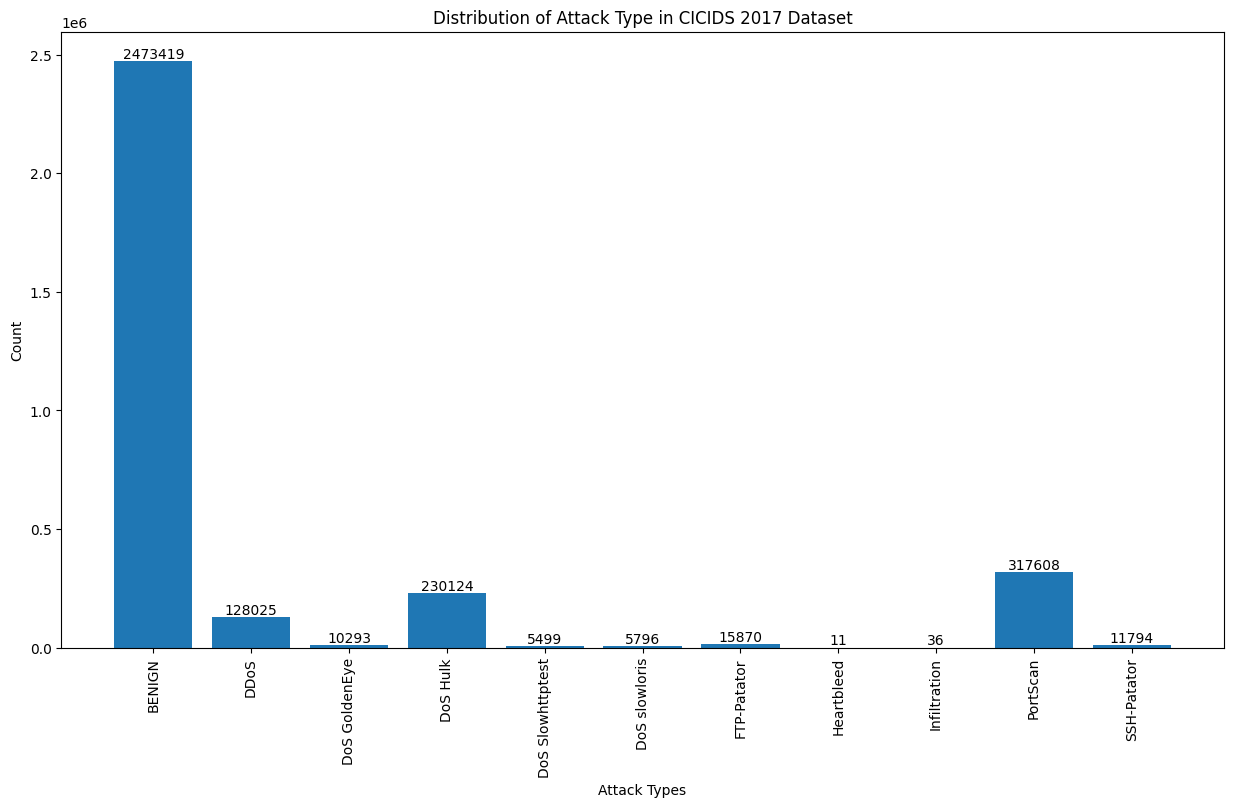

In [30]:
plt.figure(figsize=(15,8))
bars=plt.bar(value_group_label[' Label'],value_group_label[0])
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.title('Distribution of Attack Type in CICIDS 2017 Dataset')
plt.xticks(rotation=90)
for bars,value in zip(bars,value_group_label[0]):
    plt.text(bars.get_x()+bars.get_width()/2,bars.get_height(),value,ha='center',va='bottom')

In [35]:
column_types=['Numerical','Categorical']
column_values=[len(df.select_dtypes(include=['int','float']).columns),len(df.select_dtypes(include=['object']).columns)]

In [37]:
column_values

[80, 5]

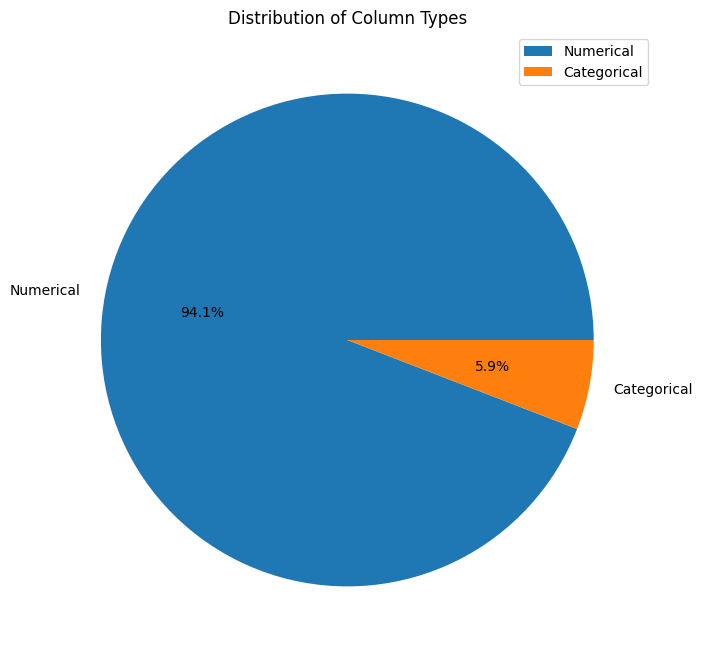

In [42]:
plt.figure(figsize=(12,8))
plt.pie(column_values,labels=column_types,autopct='%1.1f%%')
plt.title("Distribution of Column Types")
plt.legend()

In [43]:
import seaborn as sns

/var/folders/8f/z5l4p_8x4479qg_692rkgtzh0000gn/T/ipykernel_26313/883287539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)


Text(0.5, 1.0, 'Correlation Heatmap of Features')

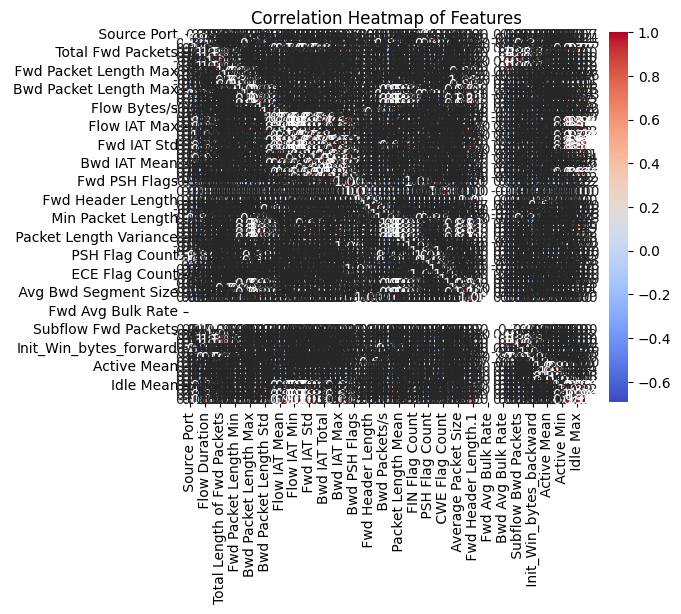

In [45]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')